# `scipy.spatial` 

scipy.spatial can compute triangulations, Voronoi diagrams, and convex hulls of a set of points, by leveraging the `Qhull` library.

Moreover, it contains `KDTree` implementations for nearest-neighbor point queries, and utilities for distance computations in various metrics.

## Triangulations (qhull)

In [1]:
%matplotlib inline

import numpy as np
from scipy.spatial import Delaunay, ConvexHull, Voronoi
import matplotlib.pyplot as plt


points = np.random.rand(30, 2)   # 30 random points in 2-D

tri = Delaunay(points)
hull = ConvexHull(points)
voronoi = Voronoi(points)

In [2]:
print ("Neighbour triangles\n",tri.neighbors[0:5])
print ("Simplices\n", tri.simplices[0:5])
print ("Points\n", points[tri.simplices[0:5]])

Neighbour triangles
 [[-1  1  9]
 [ 0 23  2]
 [24  3  1]
 [ 2 21 10]
 [14 11 22]]
Simplices
 [[19 16 10]
 [ 7 19 10]
 [19  7 23]
 [18 19 23]
 [18 14  8]]
Points
 [[[0.44335746 0.10930832]
  [0.22589492 0.07251651]
  [0.99925819 0.12571018]]

 [[0.77908979 0.13451314]
  [0.44335746 0.10930832]
  [0.99925819 0.12571018]]

 [[0.44335746 0.10930832]
  [0.77908979 0.13451314]
  [0.53000145 0.37304913]]

 [[0.36231073 0.28818328]
  [0.44335746 0.10930832]
  [0.53000145 0.37304913]]

 [[0.36231073 0.28818328]
  [0.28727931 0.47591566]
  [0.22760896 0.27468875]]]


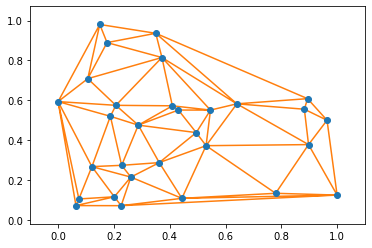

In [3]:
from scipy.spatial import delaunay_plot_2d
delaunay_plot_2d(tri)
pass

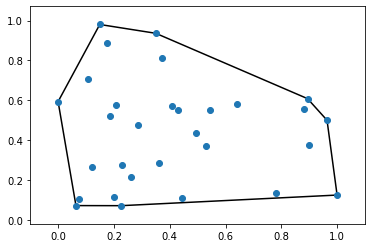

In [4]:
from scipy.spatial import convex_hull_plot_2d

convex_hull_plot_2d(hull)
pass

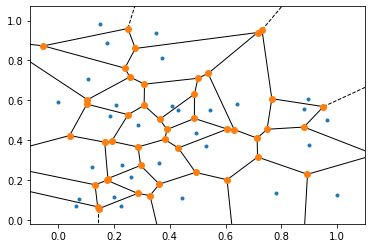

In [5]:
from scipy.spatial import voronoi_plot_2d

voronoi_plot_2d(voronoi)
pass

## KDtree

Allows very fast point to point searches.

In [6]:
from scipy.spatial import KDTree, cKDTree

In [7]:
tree = cKDTree(points)

print (tree.data)

[[1.21040123e-01 2.68096705e-01]
 [7.44231665e-02 1.06192370e-01]
 [8.96926595e-01 3.78453310e-01]
 [1.75303761e-01 8.89385436e-01]
 [8.93409531e-01 6.08622188e-01]
 [4.30768241e-01 5.51571087e-01]
 [6.40182384e-01 5.82706508e-01]
 [7.79089794e-01 1.34513145e-01]
 [2.27608959e-01 2.74688746e-01]
 [3.49751216e-01 9.35987392e-01]
 [9.99258192e-01 1.25710176e-01]
 [9.63201113e-01 5.00423872e-01]
 [2.39994295e-05 5.93888315e-01]
 [1.87291801e-01 5.20211407e-01]
 [2.87279308e-01 4.75915655e-01]
 [8.82038818e-01 5.55674589e-01]
 [2.25894919e-01 7.25165117e-02]
 [2.06920790e-01 5.75185186e-01]
 [3.62310729e-01 2.88183283e-01]
 [4.43357461e-01 1.09308319e-01]
 [1.49224605e-01 9.80129082e-01]
 [1.06263621e-01 7.08767613e-01]
 [6.39554536e-02 7.29617154e-02]
 [5.30001445e-01 3.73049126e-01]
 [4.94760558e-01 4.38566003e-01]
 [2.60621682e-01 2.15737030e-01]
 [2.01417801e-01 1.16984344e-01]
 [3.71868345e-01 8.14670771e-01]
 [4.09264498e-01 5.72747914e-01]
 [5.45696750e-01 5.51313402e-01]]


In [8]:
%%timeit

tree.query((0.5,0.5))

28.8 µs ± 205 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
test_points = np.random.rand(1000, 2)   # 1000 random points in 2-D

In [10]:
%%timeit

tree.query(test_points) 

578 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
more_points = np.random.rand(10000, 2)   # 1000 random points in 2-D

big_tree = KDTree(more_points)

In [12]:
%%timeit

KDTree(more_points)

4.21 ms ± 9.63 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit

big_tree.query(test_points) 

974 µs ± 33.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Compare this to the brute-force version


At what point does it make sense to use kdTree and not brute-force distance tests ?

The brute force method takes a fixed time per sample point and a fixed cost associated with the N-neighbour distance computation (but this can be vectorised efficiently).

In [14]:
# Brute force version

def brute_force_distance(pts, spt):

    d = pts - spt
    d2 = d**2
    distances2 = np.einsum('ij->i',d2)
    
    nearest = np.argsort(distances2)[0]
    
    return np.sqrt(distances2[nearest]), nearest

# print np.einsum('ij->i',distances2)

In [15]:
print (brute_force_distance(more_points, (0.0,0.0)))
print (big_tree.query((0.0,0.0)))

(0.0046319079708981095, 6584)
(0.0046319079708981095, 6584)


In [16]:
%%timeit

brute_force_distance(points, (0.5,0.5))
brute_force_distance(points, (0.0,0.0))
brute_force_distance(points, (0.25,0.25))

40 µs ± 248 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
%%timeit

tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

37.9 µs ± 1.65 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
%%timeit

brute_force_distance(more_points, (0.5,0.5))
# brute_force_distance(more_points, (0.0,0.0))
# brute_force_distance(more_points, (0.25,0.25))

1.02 ms ± 29.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
%%timeit

big_tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

36.7 µs ± 1.12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
